In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc
from imblearn.over_sampling import SMOTE
from pandas import value_counts
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [5]:
data=pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


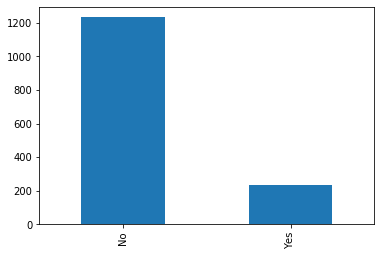

In [8]:
data['Attrition'].value_counts().plot(kind='bar')

In [9]:
columns=[a.encode('utf-8') for a in list(data.columns)]

In [11]:
def minmaxnorm(y):
    obj=MinMaxScaler(feature_range=(0.1,1),copy=True)
    yy=obj.fit_transform(np.asarray(y).reshape(-1,1))
    s=yy.shape
    return(yy.reshape(s[1],s[0]).tolist()[0])
colll=data.columns

for i in range(len(colll)):
    try:
        if abs(stats.skew(data[colll[i]]))>0.5:
            data[colll[i]]=list(stats.boxcox(minmaxnorm(data[colll[i]]))[0])
    except:
        print('skipped '+str(i)+' column')

skipped 1 column
skipped 2 column
skipped 4 column
skipped 7 column
skipped 11 column
skipped 15 column
skipped 17 column
skipped 21 column
skipped 22 column


In [12]:
for i in data.columns:
    try:
        if abs(stats.skew(data[i]))<1:
            print('under control',stats.skew(data[i]))
        else:
            print('not under control',stats.skew(data[i]))
    except:
        print('cat')

under control 0.41286446154785084
cat
cat
under control -0.003514976958291024
cat
under control 0.028523205491103303
under control -0.2893854052028825
cat
under control 0.0
under control 0.01655710251921753
under control -0.3213261358382832
cat
under control -0.03227797319055416
under control -0.4979106286269671
under control -0.008446578339667806
cat
under control -0.3293354633089524
cat
under control 0.07257674042951506
under control 0.01855884556846042
under control 0.014798473222014302
cat
cat
under control -0.020690505756302022
not under control 1.919921041210947
under control -0.3025184698222079
under control 0.0
under control 0.005923221423351136
under control -0.0004168995434561395
under control 0.07106351622062951
under control -0.11328887135029446
under control 0.033867561900672916
under control -0.016503234337405064
under control 0.2681915190132527
under control -0.022290438225524897


In [13]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,-2.574708,2,Life Sciences,1,1,...,1,80,-2.339574,-1.266343,-1.160545,-0.707403,-1.924524,-1.142672,-7.396027,-0.957913
1,49,No,Travel_Frequently,279,Research & Development,-1.186319,1,Life Sciences,1,2,...,4,80,-0.922111,-1.118766,-0.490857,-0.283049,-1.398510,-0.771227,-4.523083,-0.725184
2,37,Yes,Travel_Rarely,1373,Research & Development,-2.232187,2,Other,1,4,...,2,80,-2.339574,-1.349215,-0.490857,-0.283049,-3.660583,-2.085272,-7.396027,-2.049313
3,33,No,Travel_Frequently,1392,Research & Development,-1.970876,4,Life Sciences,1,5,...,3,80,-2.339574,-1.266343,-0.490857,-0.283049,-1.632348,-0.771227,-2.333433,-2.049313
4,27,No,Travel_Rarely,591,Research & Development,-2.232187,1,Medical,1,7,...,4,80,-0.922111,-1.439603,-0.490857,-0.283049,-2.836797,-1.501159,-3.148095,-1.458226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,-0.216457,2,Medical,1,2061,...,3,80,-0.922111,-0.726601,-0.490857,-0.283049,-2.101267,-1.501159,-7.396027,-1.261528
1466,39,No,Travel_Rarely,613,Research & Development,-1.434226,1,Medical,1,2062,...,1,80,-0.922111,-1.189830,-0.153826,-0.283049,-1.769647,-0.771227,-4.523083,-0.725184
1467,27,No,Travel_Rarely,155,Research & Development,-1.760424,3,Life Sciences,1,2064,...,2,80,-0.922111,-1.439603,-1.160545,-0.283049,-1.924524,-1.501159,-7.396027,-1.261528
1468,49,No,Travel_Frequently,1023,Sales,-2.232187,3,Medical,1,2065,...,4,80,-2.339574,-0.726601,-0.490857,-0.525629,-1.509443,-0.880490,-7.396027,-0.626012


In [15]:
box_cox_df = pd.read_csv('./boxcoxtransformed.csv')

In [16]:
box_cox_df.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
box_cox_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,-2.574708,2,Life Sciences,1,1,...,1,80,0,-1.266343,-1.160545,1,-1.924524,-1.142672,-7.396027,-0.957913
1,49,No,Travel_Frequently,279,Research & Development,-1.186319,1,Life Sciences,1,2,...,4,80,1,-1.118766,-0.490857,3,-1.398510,-0.771227,-4.523083,-0.725184
2,37,Yes,Travel_Rarely,1373,Research & Development,-2.232187,2,Other,1,4,...,2,80,0,-1.349215,-0.490857,3,-3.660583,-2.085272,-7.396027,-2.049313
3,33,No,Travel_Frequently,1392,Research & Development,-1.970876,4,Life Sciences,1,5,...,3,80,0,-1.266343,-0.490857,3,-1.632348,-0.771227,-2.333433,-2.049313
4,27,No,Travel_Rarely,591,Research & Development,-2.232187,1,Medical,1,7,...,4,80,1,-1.439603,-0.490857,3,-2.836797,-1.501159,-3.148094,-1.458226


In [18]:
categorical_columns = ['Attrition','BusinessTravel','Department','Education','EducationField',\
                       'EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel',\
                      'JobRole','JobSatisfaction','MaritalStatus','Over18',\
                      'OverTime','PerformanceRating','RelationshipSatisfaction',\
                      'StockOptionLevel','WorkLifeBalance']

In [19]:
for column in categorical_columns:
    box_cox_df[column] = box_cox_df[column].astype('category')

In [20]:
X = box_cox_df.iloc[:,box_cox_df.columns!='Attrition']

In [23]:
transformed_data = pd.get_dummies(X)
features=transformed_data.columns
np_transformed = np.array(transformed_data)
pca = PCA(0.90)    #95% variance

In [24]:
pca.fit(scale(transformed_data))

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.explained_variance_ratio_

array([0.07100357, 0.04668672, 0.03655199, 0.03415231, 0.0320853 ,
       0.02865805, 0.02664364, 0.02623724, 0.0253624 , 0.02387915,
       0.02264375, 0.02220428, 0.02156875, 0.02092606, 0.02016837,
       0.01932091, 0.01922091, 0.01899426, 0.01822452, 0.01799693,
       0.01754681, 0.01686893, 0.01673703, 0.01627218, 0.0160242 ,
       0.01587399, 0.01556294, 0.01519278, 0.01502136, 0.0146276 ,
       0.01453964, 0.01418352, 0.01389457, 0.01369644, 0.01342509,
       0.01334902, 0.01309276, 0.01296693, 0.01271009, 0.01257932,
       0.01217969, 0.01193703, 0.01182691, 0.01154374, 0.01132336])

In [26]:
pca.n_components_

45

In [27]:
reduced_df = pca.transform(scale(transformed_data))

In [28]:
columns = ['pca_%i' % i for i in range(pca.n_components_)]
df_pca = pd.DataFrame(reduced_df, columns=columns)

In [30]:
def metrics(y_pred,y_true):
    print ('accuracy = ' ,accuracy_score(y_pred=y_pred,y_true=y_true))
    print ('recall = ' ,recall_score(y_pred=y_pred,y_true=y_true))
    print ('precision = ' ,precision_score(y_pred=y_pred,y_true=y_true))
    print ('f1 score = ' ,f1_score(y_pred=y_pred,y_true=y_true))

In [31]:
def resample(x,y):
    resampling=SMOTE(sampling_strategy='auto')
    xx,yy=resampling.fit_sample(x,y)
    return(xx,yy)

In [58]:
def crossvalidation(obj,objtext,X,Y,folds):
    acc=[]
    precision=[]
    recall=[]
    f1score=[]
    Xarr=np.asarray(X)
    Yarr=np.asarray(Y)
    if len(Xarr)==len(Yarr):
        for i in range(folds-1):
            if i==0 or i==folds-2:
                print('cross flod validation fold '+ '{}'.format(i+1))
                aX,bX=np.split(Xarr,[int(len(Xarr)*(i+1)/folds)])
                aY,bY=np.split(Yarr,[int(len(Yarr)*(i+1)/folds)])
                if len(aX)>len(bX):
                    X_train,X_test,Y_train,Y_test=aX,bX,aY,bY
                else:
                    X_train,X_test,Y_train,Y_test=bX,aX,bY,aY
                prediction=obj.predict(X=X_test)
                jj=0
                for i in range(len(list(prediction))):
                    if (list(prediction)[i]==list(Y_test)[i]):
                        jj+=1
                acc.append(float(jj)/len(prediction))
                precision.append(precision_score(y_pred=list(prediction),y_true=list(Y_test),average='weighted'))
                recall.append(recall_score(y_pred=list(prediction),y_true=list(Y_test),average='weighted'))
                f1score.append(f1_score(y_pred=list(prediction),y_true=list(Y_test),average='weighted'))
            else:
                print('cross flod validation fold '+ '{}'.format(i+1))
                aX,bX,cX=np.split(Xarr,[int(len(Xarr)*(i)/folds),int(len(Xarr)*(i+1)/folds)])
                aY,bY,cY=np.split(Yarr,[int(len(Xarr)*(i)/folds),int(len(Xarr)*(i+1)/folds)])
                aX,aY=np.concatenate((aX,cX),axis=0),np.concatenate((aY,cY),axis=0)
                X_train,X_test,Y_train,Y_test=aX,bX,aY,bY
                print('Fold 1')
                prediction=eval('{}'.format(objtext)+'model(X_train,X_test,Y_train)')
                jj=0
                for i in range(len(list(prediction))):
                    if (list(prediction)[i]==list(Y_test)[i]):
                        jj+=1
                acc.append(float(jj)/len(prediction))
                precision.append(precision_score(y_pred=list(prediction),y_true=list(Y_test),average='weighted'))
                recall.append(recall_score(y_pred=list(prediction),y_true=list(Y_test),average='weighted'))
                f1score.append(f1_score(y_pred=list(prediction),y_true=list(Y_test),average='weighted'))
        pre=sum(precision)/float(len(precision))
        rec=sum(recall)/float(len(recall))
        f1=sum(f1score)/float(len(f1score))
        ac=sum(acc)/float(len(acc))
        return(acc,pre,rec,f1)
    else:
        raise ValueError ('length of X and Y is not equal')

<center><font size=10>With PCA</font><center>

In [33]:
YY=[1 if i=='Yes' else 0 for i in data['Attrition']]

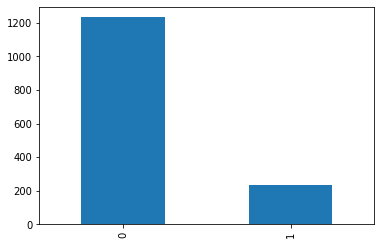

In [34]:
pd.DataFrame(data=YY)[0].value_counts().plot(kind='bar')

In [35]:
df_pca_,YY_pca=resample(x=df_pca,y=YY)

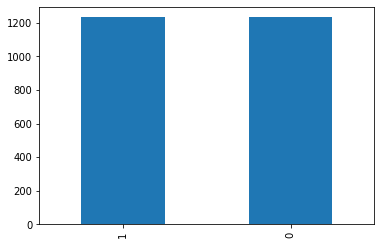

In [36]:
pd.DataFrame(data=YY_pca)[0].value_counts().plot(kind='bar')

In [37]:
XX_pca=np.asarray(df_pca_)

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(XX_pca,YY_pca,test_size=0.2)

In [39]:
Model_RF=RandomForestClassifier(class_weight='balanced')

In [40]:
Model_RF.fit(X=X_train,y=Y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [41]:
predicted_values_RF=Model_RF.predict(X=X_test)

In [42]:
print('Random Forest Classifier With PCA')
metrics(y_pred=predicted_values_RF,y_true=Y_test)

Random Forest Classifier With PCA
accuracy =  0.8927125506072875
recall =  0.8690476190476191
precision =  0.9163179916317992
f1 score =  0.8920570264765784


In [59]:
def RFmodel(X_train,X_test,Y_train):
    Model_RF=RandomForestClassifier(class_weight='balanced')
    Model_RF.fit(X=X_train,y=Y_train)
    predicted_values_RF=Model_RF.predict(X=X_test)
    return(predicted_values_RF)
crossvalidation(Model_RF,"RF",XX_pca,YY_pca,5)

cross flod validation fold 1
cross flod validation fold 2
Fold 1


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


cross flod validation fold 3
Fold 1
cross flod validation fold 4


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


([0.9797160243407708,
  0.8701825557809331,
  0.845841784989858,
  0.9736842105263158],
 0.9420787758660162,
 0.9173561439094694,
 0.92589260872547)

In [60]:
Model_LR=LogisticRegression(class_weight='balanced')

In [61]:
Model_LR.fit(X=X_train,y=Y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
predicted_values_LR=Model_LR.predict(X=X_test)

In [63]:
print('Logistic Regression With PCA')
metrics(y_pred=predicted_values_LR,y_true=Y_test)

Logistic Regression With PCA
accuracy =  0.8218623481781376
recall =  0.8253968253968254
precision =  0.8253968253968254
f1 score =  0.8253968253968254


In [67]:
def LRmodel(X_train,X_test,Y_train):
    Model_LR=LogisticRegression(class_weight='balanced')
    Model_LR.fit(X=X_train,y=Y_train)
    predicted_values_LR=Model_LR.predict(X=X_test)
    return(predicted_values_LR)
crossvalidation(Model_LR,"LR",XX_pca,YY_pca,5)

cross flod validation fold 1
cross flod validation fold 2
Fold 1
cross flod validation fold 3
Fold 1
cross flod validation fold 4


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


([0.8133874239350912,
  0.8012170385395537,
  0.6673427991886409,
  0.8380566801619433],
 0.897914954701224,
 0.7800009854563072,
 0.8180957020091271)

<center><font size=10>Without PCA</font><center>

In [64]:
XX_woPCA,YY_wo=resample(x=transformed_data,y=YY)

In [65]:
XX_woPCA=np.asarray(XX_woPCA)

In [66]:
X_train_wo,X_test_wo,Y_train_wo,Y_test_wo=train_test_split(XX_woPCA,YY_wo,test_size=0.2)

In [68]:
Model_RF=RandomForestClassifier(class_weight='balanced')

In [69]:
Model_RF.fit(X=X_train_wo,y=Y_train_wo)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [70]:
predicted_values_RF_wo=Model_RF.predict(X=X_test_wo)

In [71]:
print('Random Forest Classifier Without PCA')
metrics(y_pred=predicted_values_RF_wo,y_true=Y_test_wo)

Random Forest Classifier Without PCA
accuracy =  0.9109311740890689
recall =  0.8582677165354331
precision =  0.9646017699115044
f1 score =  0.9083333333333333


In [72]:
Model_LR=LogisticRegression(class_weight='balanced')

In [73]:
Model_LR.fit(X=X_train_wo,y=Y_train_wo)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
predicted_values_LR_wo=Model_LR.predict(X=X_test_wo)

In [75]:
print('Logistic Regression Without PCA')
metrics(y_pred=predicted_values_LR_wo,y_true=Y_test_wo)

Logistic Regression Without PCA
accuracy =  0.8238866396761133
recall =  0.8307086614173228
precision =  0.8274509803921568
f1 score =  0.8290766208251472


In [76]:
def feature_importance(model):
    importances=model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    for f in range(transformed_data.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

In [77]:
feature_importance(Model_RF)

1. feature OverTime_Yes (0.102470)
2. feature JobLevel_1 (0.070768)
3. feature OverTime_No (0.070659)
4. feature MaritalStatus_Single (0.046791)
5. feature StockOptionLevel_1 (0.036476)
6. feature BusinessTravel_Travel_Frequently (0.033118)
7. feature EnvironmentSatisfaction_1 (0.028682)
8. feature Department_Research & Development (0.026630)
9. feature MonthlyIncome (0.025157)
10. feature Education_3 (0.021556)
11. feature Age (0.021046)
12. feature StockOptionLevel_0 (0.018406)
13. feature DistanceFromHome (0.017604)
14. feature TotalWorkingYears (0.017574)
15. feature EmployeeNumber (0.017370)
16. feature EnvironmentSatisfaction_3 (0.017303)
17. feature YearsWithCurrManager (0.017028)
18. feature WorkLifeBalance_3 (0.016066)
19. feature DailyRate (0.015982)
20. feature YearsAtCompany (0.015485)
21. feature MonthlyRate (0.015347)
22. feature JobLevel_2 (0.015031)
23. feature JobRole_Sales Representative (0.014805)
24. feature MaritalStatus_Married (0.014544)
25. feature YearsInCurren

In [79]:
importance=Model_RF.feature_importances_
importance=np.sort(importance)[::-1]
temp=0
aggri=[]
for i in list(importance):
    temp=temp+i
    aggri.append(temp)
aggri=np.asarray(aggri)
for i in range(100):
    print (float(100-i)/100,'=', len(aggri[aggri<(float(100-i)/100)]))

1.0 = 78
0.99 = 69
0.98 = 64
0.97 = 60
0.96 = 57
0.95 = 54
0.94 = 52
0.93 = 50
0.92 = 48
0.91 = 47
0.9 = 45
0.89 = 43
0.88 = 42
0.87 = 40
0.86 = 39
0.85 = 38
0.84 = 37
0.83 = 35
0.82 = 34
0.81 = 33
0.8 = 32
0.79 = 31
0.78 = 30
0.77 = 29
0.76 = 28
0.75 = 27
0.74 = 27
0.73 = 26
0.72 = 25
0.71 = 25
0.7 = 24
0.69 = 23
0.68 = 22
0.67 = 22
0.66 = 21
0.65 = 20
0.64 = 20
0.63 = 19
0.62 = 18
0.61 = 18
0.6 = 17
0.59 = 17
0.58 = 16
0.57 = 15
0.56 = 15
0.55 = 14
0.54 = 14
0.53 = 13
0.52 = 13
0.51 = 12
0.5 = 11
0.49 = 11
0.48 = 10
0.47 = 10
0.46 = 9
0.45 = 9
0.44 = 8
0.43 = 8
0.42 = 8
0.41 = 7
0.4 = 7
0.39 = 7
0.38 = 6
0.37 = 6
0.36 = 5
0.35 = 5
0.34 = 5
0.33 = 5
0.32 = 4
0.31 = 4
0.3 = 4
0.29 = 3
0.28 = 3
0.27 = 3
0.26 = 3
0.25 = 3
0.24 = 2
0.23 = 2
0.22 = 2
0.21 = 2
0.2 = 2
0.19 = 2
0.18 = 2
0.17 = 1
0.16 = 1
0.15 = 1
0.14 = 1
0.13 = 1
0.12 = 1
0.11 = 1
0.1 = 0
0.09 = 0
0.08 = 0
0.07 = 0
0.06 = 0
0.05 = 0
0.04 = 0
0.03 = 0
0.02 = 0
0.01 = 0
